In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [9]:
# Hàm trực quan hóa dự báo tương lai
def visualize_future_forecast(future_forecast, y_test, y_pred, dates_test, future_dates):
    """
    Trực quan hóa dữ liệu thực tế, dự đoán và dự báo tương lai.

    Args:
        future_forecast (array): Giá trị dự báo cho tương lai.
        y_test (array): Dữ liệu thực tế từ tập kiểm tra.
        y_pred (array): Giá trị dự đoán từ mô hình.
        dates_test (array): Ngày tương ứng với `y_test`.
        future_dates (array): Ngày tương ứng với dự báo tương lai.
    """
    plt.figure(figsize=(12, 6))

    plt.plot(dates_test, y_test, label="Thực tế (Test)", color="blue")
    plt.plot(dates_test, y_pred, label="Dự đoán (Test)", color="orange", linestyle="--")
    plt.plot(future_dates, future_forecast, label="Dự báo (Future)", color="green", linestyle=":")

    # Định dạng đồ thị
    plt.title("So sánh và Dự báo Nhiệt độ", fontsize=16)
    plt.xlabel("Ngày", fontsize=12)
    plt.ylabel("Nhiệt độ (°C)", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [10]:
# Hàm trực quan hóa giá trị thực tế và dự đoán trên tập kiểm tra
def visualize_test_results(y_test, y_pred):
    """
    Trực quan hóa giá trị thực tế và giá trị dự đoán trên tập kiểm tra.

    Args:
        y_test (array): Giá trị thực tế từ tập kiểm tra.
        y_pred (array): Giá trị dự đoán từ mô hình.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label="Thực tế", color="blue")
    plt.plot(y_pred, label="Dự đoán", color="orange", linestyle="--")

    # Định dạng đồ thị
    plt.title("So sánh Thực tế và Dự đoán trên Tập Kiểm tra", fontsize=16)
    plt.xlabel("Mẫu", fontsize=12)
    plt.ylabel("Nhiệt độ (°C)", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [11]:
# Hàm đánh giá mô hình
def evaluate_model(y_test, y_pred):
    """
    Tính toán các chỉ số lỗi: MAE, MSE, RMSE.

    Args:
        y_test (array): Giá trị thực tế từ tập kiểm tra.
        y_pred (array): Giá trị dự đoán từ mô hình.

    Returns:
        None
    """
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")

Index(['humidity', 'rainfall_mm', 'wind_speed_kph', 'city_Hanoi',
       'city_Ho Chi Minh City', 'temp_c'],
      dtype='object')


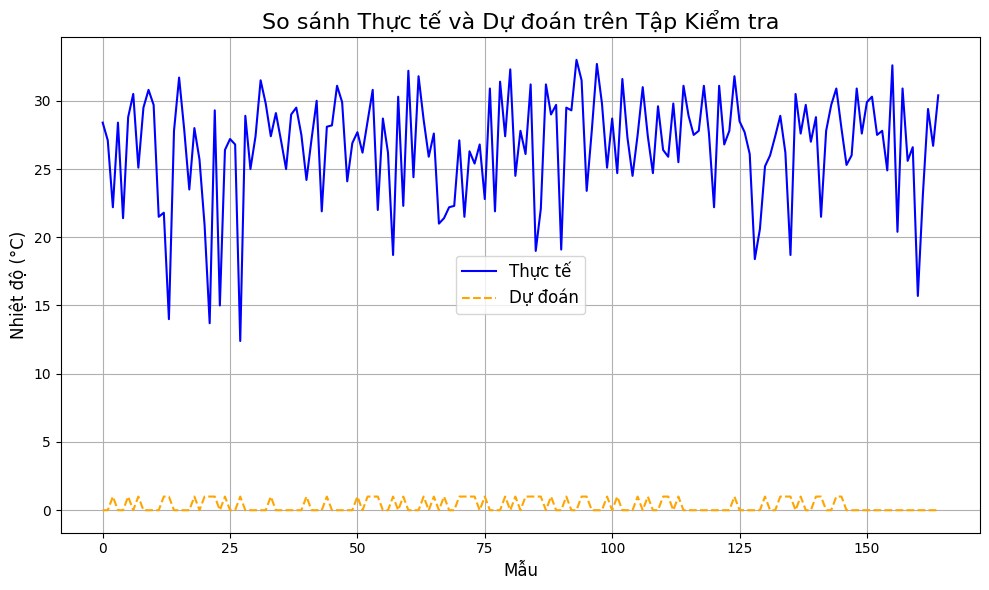

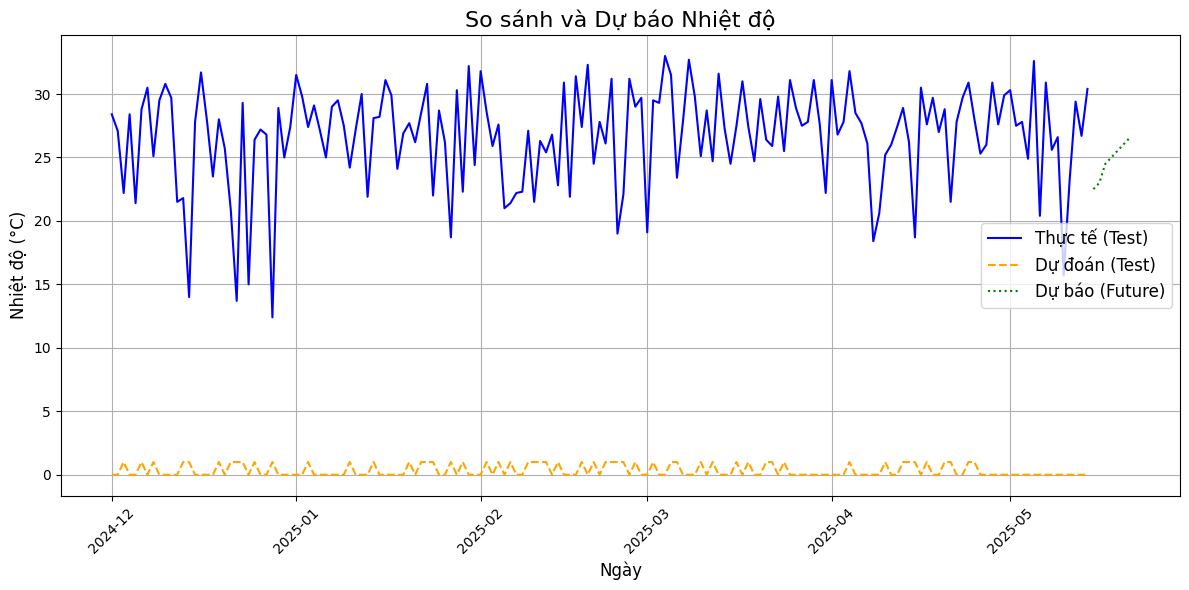

MAE: 26.36
MSE: 711.68
RMSE: 26.68


In [14]:
if __name__ == "__main__":
    test_data = pd.read_csv("./data/test.csv")  
    print(test_data.columns)  

    if 'temp_c' in test_data.columns:
        y_test = test_data['temp_c']  # Thực tế
    else:
        print("Cột 'temp_c' không tồn tại trong dữ liệu.")
        y_test = None

    if 'city_Hanoi' in test_data.columns:  
        y_pred = test_data['city_Hanoi']     
    else:
        print("Cột dự báo không tồn tại trong dữ liệu.")
        y_pred = None

    if y_test is not None and y_pred is not None:
        dates_test = pd.to_datetime(test_data['Date']) if 'Date' in test_data.columns else pd.date_range(start='2024-12-01', periods=len(y_test))

        future_forecast = [22.5, 23.0, 24.5, 25.0, 25.5, 26.0, 26.5]  # Dự báo 7 ngày tiếp theo
        future_dates = pd.date_range(start=dates_test.max() + pd.Timedelta(days=1), periods=len(future_forecast))

        # Trực quan hóa dữ liệu
        visualize_test_results(y_test, y_pred)
        visualize_future_forecast(future_forecast, y_test, y_pred, dates_test, future_dates)

        # Đánh giá mô hình
        evaluate_model(y_test, y_pred)